# k-Nearest Neighbors Classification

Project using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.

UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

In [176]:
# conda install seaborn

In [177]:
# imports needed for the project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

In [179]:
colnames= ['sepal_length','sepal_width','petal_length','petal_width', 'class']
df_iris = pd.read_csv('iris.data', names=colnames)

**Data inspection.**
- Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.

In [180]:
df_iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [181]:
df_iris.shape

(150, 5)

In [182]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [183]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [184]:
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [185]:
df_iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
class            3
dtype: int64

In [186]:
df_iris.value_counts()

sepal_length  sepal_width  petal_length  petal_width  class          
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
              4.0          1.2           0.2          Iris-setosa        1
5.9           3.0          4.2           1.5          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
                                                                        ..
5.5           2.3          4.0           1.3          Iris-versicolor    1
              2.4          3.7           1.0          Iris-versicolor    1
                           3.8           1.1          Iris-versicolor    1
              2.5          4.0           1.3          Iris-versicolor    1
7.9           3.8          6.4           2.0          Iris-virginica     1
Length: 147, dtype: int64

<Axes: >

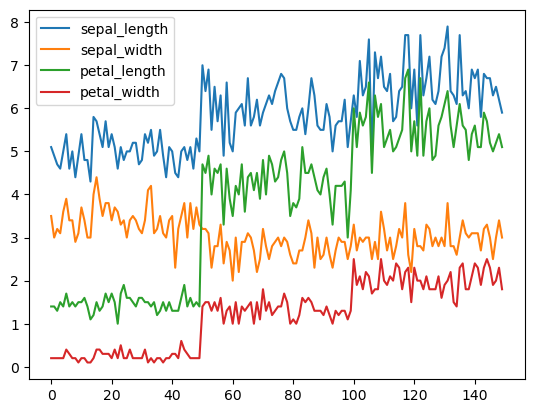

In [187]:
df_iris.plot()

- Scatter plots: </br> - sepal_width vs sepal_length </br> - petal_width vs petal_length. </br> (seaborn.lmplot for plotting).

C:\Users\rdmca\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


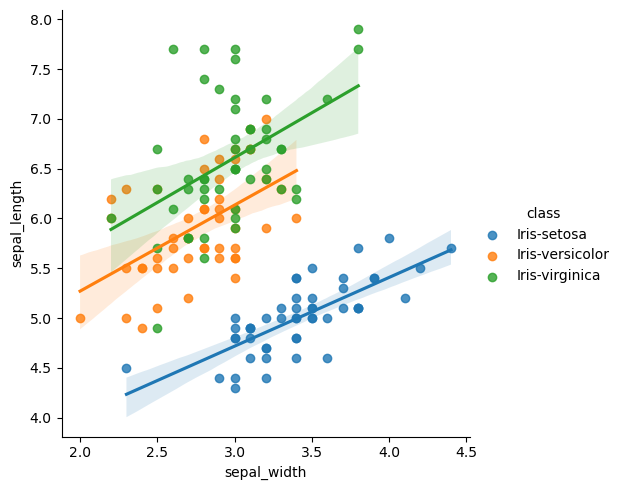

In [188]:
import seaborn as sns
sns.lmplot(x ='sepal_width', y ='sepal_length', data = df_iris, hue="class")

C:\Users\rdmca\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


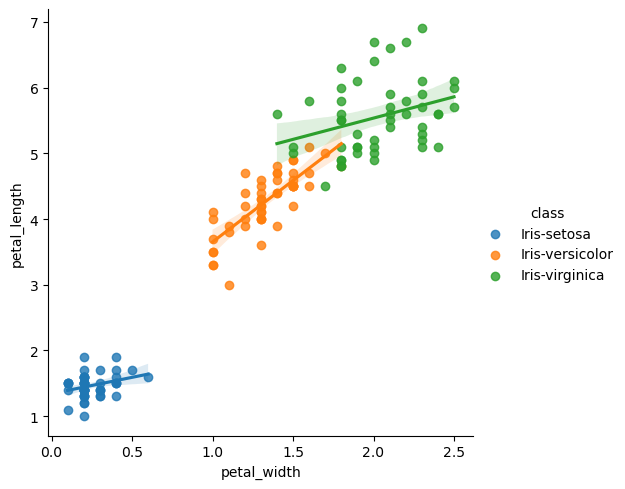

In [189]:
sns.lmplot(x ='petal_width', y ='petal_length', data = df_iris, hue="class")

**Prepare the data for classification**. 
    - Prepare K-Nearest Neighborsthe feature variables `X` and the response `Y` for the fit.

In [190]:
X = df_iris.drop('class', axis=1).values
# X

In [191]:
y = df_iris['class'].values
# y

**Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

In [192]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [193]:
# Scale the features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('X_train_scaled:', X_train_scaled.min(), X_train_scaled.max())
print('X_test_scaled:', X_test_scaled.min(), X_test_scaled.max())

X_train_scaled: 0.0 1.0
X_test_scaled: 0.0 1.0588235294117647


**Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`.

- First, instantiate the model

In [194]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)

- Then, run the classifier on the training set.

In [195]:
%%time
knn_clf.fit(X_train_scaled, y_train) #train the model on the scaled training set

CPU times: total: 0 ns
Wall time: 0 ns


KNeighborsClassifier(n_neighbors=3)

Learning model to **predict the class from features**, run prediction on `X` from test part.

In [196]:
y_pred = knn_clf.predict(X_test_scaled)
print(y_pred.shape)
y_pred

(30,)


array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [197]:
len(y_pred)

30

- Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.

In [198]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


- Comparing predicted classes and test `Y`, count the numbers of correct predictions and predictions that were wrong.

 **numbers of correct predictions**

In [199]:
(y_pred == y_test).sum()

29

 **Predictions that were wrong**

In [200]:
(y_pred != y_test).sum()

1

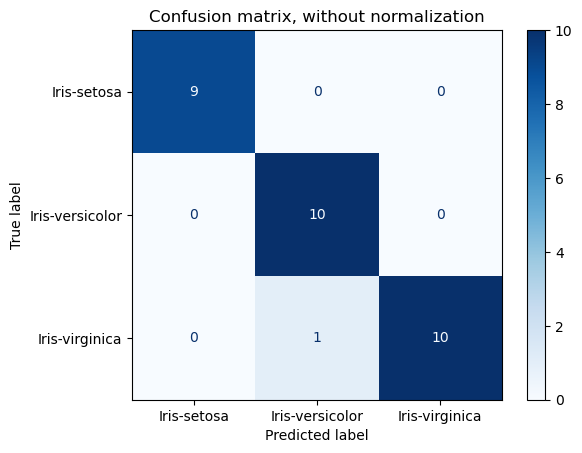

In [203]:
#visualize classification results with confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
with plt.style.context("default"): #temporarily set the plot style
    disp = ConfusionMatrixDisplay.from_estimator(
        knn_clf,
        X_test_scaled,
        y_test,
        display_labels=['Iris-setosa','Iris-versicolor','Iris-virginica'],
        cmap=plt.cm.Blues,
        normalize=None,
    )
    disp.ax_.set_title("Confusion matrix, without normalization")

Accuracy score and number of correct predictions </br>
I will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**: 

- Generate 10 random train/test splits for each value of `k`

k:1
Test size: 0.14   Accuracy: 0.9545454545454546
Test size: 0.72   Accuracy: 0.9351851851851852
Test size: 0.79   Accuracy: 0.9747899159663865
Test size: 0.23   Accuracy: 0.9714285714285714
Test size: 0.69   Accuracy: 0.9519230769230769
Test size: 0.27   Accuracy: 0.975609756097561
Test size: 0.35   Accuracy: 0.9622641509433962
Test size: 0.64   Accuracy: 0.9583333333333334
Test size: 0.87   Accuracy: 0.9465648854961832
Test size: 0.71   Accuracy: 0.9906542056074766

******************************************
Average Accuracy score: 0.9621298535526626
Average correct predictions for k=1: 78
******************************************


k:3
Test size: 0.2   Accuracy: 0.9666666666666667
Test size: 0.46   Accuracy: 0.9565217391304348
Test size: 0.8   Accuracy: 0.95
Test size: 0.41   Accuracy: 0.967741935483871
Test size: 0.18   Accuracy: 0.8888888888888888
Test size: 0.72   Accuracy: 0.9537037037037037
Test size: 0.86   Accuracy: 0.9457364341085271
Test size: 0.49   Accuracy: 0.986486486

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

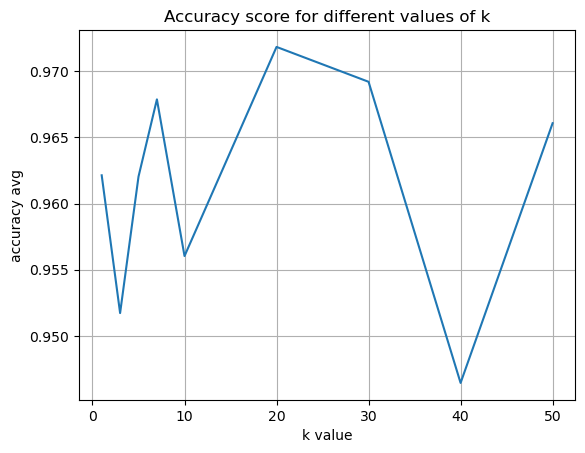

In [204]:
from statistics import mean
import matplotlib.pyplot as plt
import click

k = [1, 3, 5, 7, 10, 20, 30, 40, 50]
accuracy_list_avg = []

for num in k:
    click.secho(f"k:{num}", fg="red", bold=True, underline=True)
    knn_value = KNeighborsClassifier(n_neighbors=num)
    rdn_array = np.random.uniform(0.1,0.9,size=10)
    accuracy_list = []
    avg_predictions = []
    # print('\n')
    for i in rdn_array:
        value = float(round(i, 2))
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=value)
        # scale
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        # Fit the model for each split and generate predictions  
        knn_value.fit(X_train_scaled, y_train)
        # prediction
        y_pred = knn_clf.predict(X_test_scaled)
        # accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_list.append(accuracy)
        # average prediction         
        avg_predictions.append((y_pred == y_test).sum())
        print('{}Test size:{}'.format('\033[1m', '\033[0m'), value, '  {}Accuracy:{}'.format('\033[1m', '\033[0m'), accuracy)        
    plt.figure()
    print('\n******************************************')  
    # Average the accuracy score for each k
    click.secho(f'Average Accuracy score: {mean(accuracy_list)}', fg="blue", bold=True)
    # Calculate the average number of correct predictions for each k
    click.secho(f'Average correct predictions for k={num}: {mean(avg_predictions)}', fg="blue", bold=True)    
    print('******************************************')
    accuracy_list_avg.append(mean(accuracy_list))
    print('\n')
    
print(accuracy_list)
fig, ax = plt.subplots()
ax.plot(k, accuracy_list_avg)
ax.set(xlabel='k value', ylabel='accuracy avg',
       title='Accuracy score for different values of k')
ax.grid()

You don't need a big k value to obtain a high accuracy score. Also, the test size between 20% to 30% is recommended.